In [1]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-price-prediction/car_web_scraped_dataset.csv


# Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/used-car-price-prediction/car_web_scraped_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.2+ KB


# Preprocessing & Statistics

In [3]:
#preview sample of data to see what preprocess should handle
df.head(20)

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
5,Honda Civic,2020,"29,026 miles","Silver exterior, Black interior","1 accident reported, 1 Owner","$21,000"
6,Honda Accord,2019,"4,148 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$20,998"
7,Mercedes-Benz GLC,2018,"57,602 miles","Blue exterior, Unknown interior","1 accident reported, 3 Owners","$18,887"
8,Honda Civic,2020,"50,240 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$19,498"
9,BMW 5 Series,2013,"56,766 miles","White exterior, Black interior","No accidents reported, 3 Owners","$17,998"


In [4]:
#check unique values in condition
df['condition'].value_counts()

condition
No accidents reported, 1 Owner     1575
No accidents reported, 2 Owners     426
1 accident reported, 1 Owner        236
1 accident reported, 2 Owners       157
No accidents reported, 3 Owners     152
1 accident reported, 3 Owners        58
2 accidents reported, 1 Owner        43
No accidents reported, 4 Owners      41
2 accidents reported, 2 Owners       30
2 accidents reported, 3 Owners       26
1 accident reported, 4 Owners        17
No accidents reported, 0 Owners      13
2 accidents reported, 4 Owners       12
No accidents reported, 5 Owners      11
1 accident reported, 5 Owners        10
3 accidents reported, 1 Owner         9
4 accidents reported, 3 Owners        5
3 accidents reported, 2 Owners        4
3 accidents reported, 3 Owners        3
No accidents reported, 7 Owners       3
3 accidents reported, 4 Owners        2
5 accidents reported, 5 Owners        2
No accidents reported, 8 Owners       2
2 accidents reported, 5 Owners        2
4 accidents reported, 2 Owners

In [5]:
#remove miles from column miles and transform it to float datatype
df['miles']=df['miles'].replace('miles', '', regex=True)
df['miles']=df['miles'].replace(',', '', regex=True)
df['miles']=df['miles'].astype(float)
#remove $ from column Price and transform it to float datatype
df['price']=df['price'].str.replace('$', '')
df['price']=df['price'].replace(',', '', regex=True)
df['price']=df['price'].astype(float)
#replace 'accidents reported' into ,
df['condition']=df['condition'].replace('accidents reported,', ',', regex=True)
#replace 'accident reported' into ,
df['condition']=df['condition'].replace('accident reported,', ',', regex=True)
#replace 'No' into zero
df['condition']=df['condition'].replace('No', '0', regex=True)
#replace 'Owner' into empty
df['condition']=df['condition'].replace('Owners', '', regex=True)
#replace 'Owner' into empty
df['condition']=df['condition'].replace('Owner', '', regex=True)
# Split the 'ColumnWithCommas' into two columns based on ','
df[['accidents', 'Owners']] = df['condition'].str.split(',', expand=True)
df['accidents']=df['accidents'].astype(int)
df['Owners']=df['Owners'].astype(int)

In [6]:
#recheck dataframe after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       2840 non-null   object 
 1   year       2840 non-null   int64  
 2   miles      2840 non-null   float64
 3   color      2840 non-null   object 
 4   condition  2840 non-null   object 
 5   price      2840 non-null   float64
 6   accidents  2840 non-null   int64  
 7   Owners     2840 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 177.6+ KB


In [7]:
#Check nulls and unique values
for col in df.columns:
    print("column",col,"null values:",df[col].isnull().sum())
    print("column",col,"uniques counts:",df[col].nunique())
    print("------------------------------------------------")

column name null values: 0
column name uniques counts: 309
------------------------------------------------
column year null values: 0
column year uniques counts: 24
------------------------------------------------
column miles null values: 0
column miles uniques counts: 2280
------------------------------------------------
column color null values: 0
column color uniques counts: 64
------------------------------------------------
column condition null values: 0
column condition uniques counts: 25
------------------------------------------------
column price null values: 0
column price uniques counts: 1245
------------------------------------------------
column accidents null values: 0
column accidents uniques counts: 6
------------------------------------------------
column Owners null values: 0
column Owners uniques counts: 8
------------------------------------------------


In [8]:
#extract mark from name
df['mark'] = df['name'].str.split(' ', expand=True)[0]

In [9]:
df.describe()

,year,miles,price,accidents,Owners
count,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000
mean,2018.833803,50138.445775,25745.427465,0.278873,1.507394
std,3.557585,36482.439893,13627.610019,0.598558,0.866146
min,2000.000000,25.000000,4395.000000,0.000000,0.000000
25%,2017.000000,23233.750000,17851.000000,0.000000,1.000000
50%,2020.000000,41076.000000,23000.000000,0.000000,1.000000
75%,2021.000000,70978.250000,31222.500000,0.000000,2.000000
max,2024.000000,307292.000000,252900.000000,5.000000,8.000000


# Outliers

In [10]:
def get_outliers(col,threshold):
    category_counts = df[col].value_counts()

    # Set a threshold for low frequency
    uncommon_categories = category_counts[category_counts < threshold].index.tolist()

    # Identify rows with uncommon categories
    outliers = df[df[col].isin(uncommon_categories)]
    print("Column=",col)
    print("unique values=",len(df[col].value_counts()))
    print("Threshold=",threshold)
    print("outliers=",len(outliers))
    print("all=",len(df[col]))
    print("outlier percentages=",round(len(outliers)/len(df[col]),2) * 100 ,"%")
    print("-------------------------")
    
get_outliers('year',10)
get_outliers('accidents',50)
get_outliers('Owners',20)

Column= year
unique values= 24
Threshold= 10
outliers= 28
all= 2840
outlier percentages= 1.0 %
-------------------------
Column= accidents
unique values= 6
Threshold= 50
outliers= 26
all= 2840
outlier percentages= 1.0 %
-------------------------
Column= Owners
unique values= 8
Threshold= 20
outliers= 18
all= 2840
outlier percentages= 1.0 %
-------------------------


# EDAs

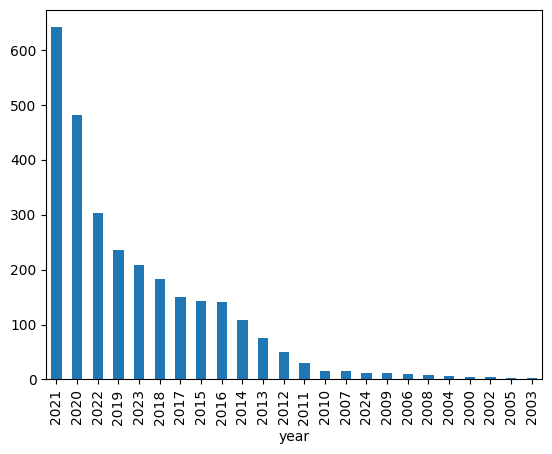

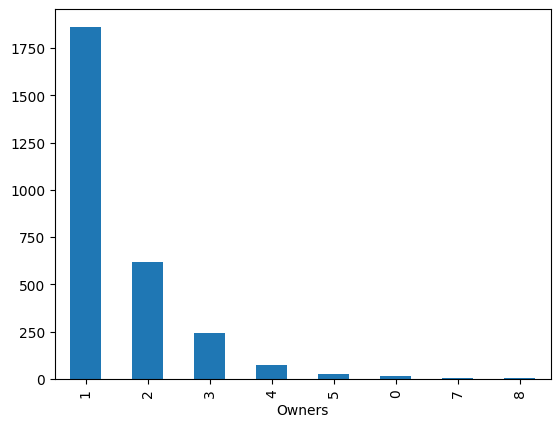

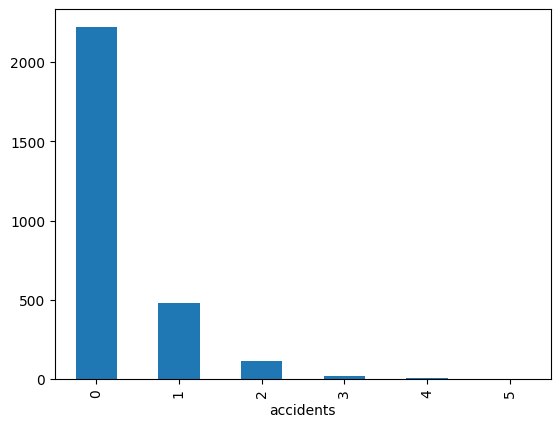

In [11]:
#Count plot for cars per year, owner, and accident
col= ['year','Owners','accidents']
for c in col:
    df[c].value_counts().plot(kind='bar')
    plt.show()

# Grouped EDAs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022'),
  Text(22, 0, '2023'),
  Text(23, 0, '2024')])

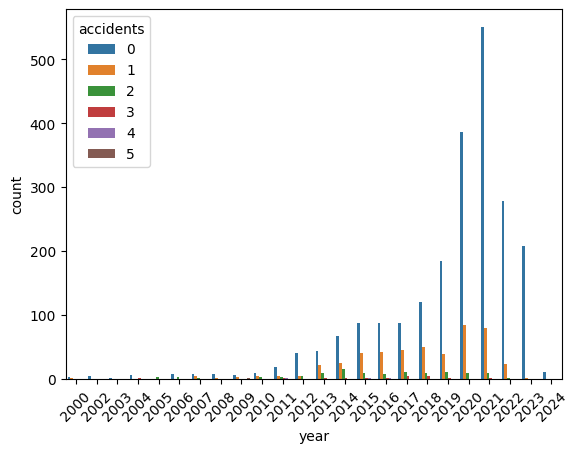

In [12]:
sns.countplot(x='year',data=df,hue='accidents')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022'),
  Text(22, 0, '2023'),
  Text(23, 0, '2024')])

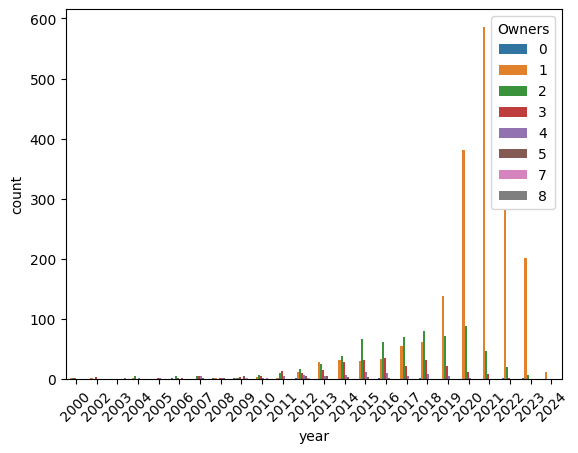

In [13]:
sns.countplot(x='year',data=df,hue='Owners')
plt.xticks(rotation=45)

In [14]:
# Aggregate 'accidents' by 'year'
df_agg = df.groupby(['year'])[['accidents','Owners']].sum().reset_index()
df_agg

,year,accidents,Owners
0,2000,1,7
1,2002,0,10
2,2003,0,16
3,2004,3,14
4,2005,6,11
5,2006,6,24
6,2007,9,50
7,2008,1,19
8,2009,13,39
9,2010,10,41


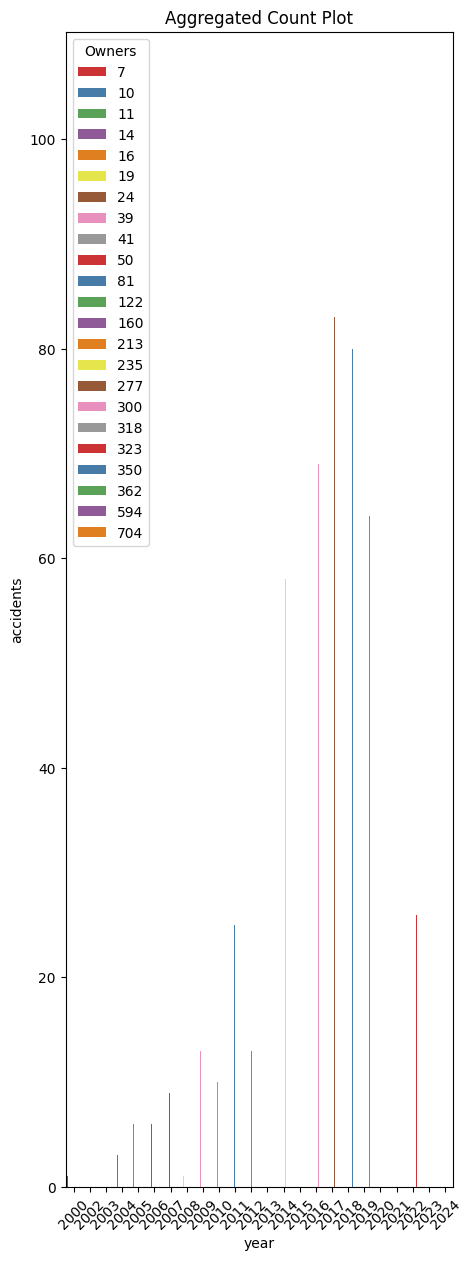

In [15]:
# Create a count plot
plt.figure(figsize=(5,15))
sns.barplot(x='year', y='accidents', hue='Owners', data=df_agg, palette='Set1')
plt.title('Aggregated Count Plot')
plt.xticks(rotation=45)
plt.show()

# Statitical plots

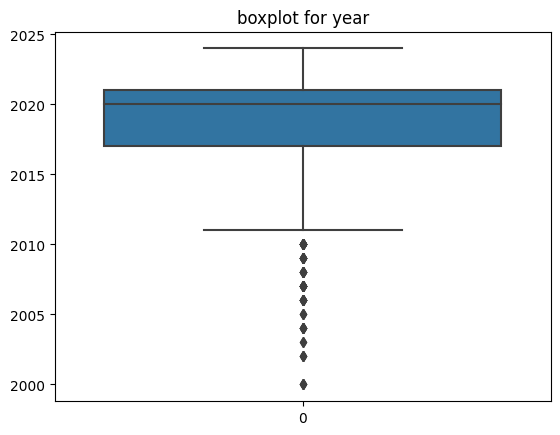

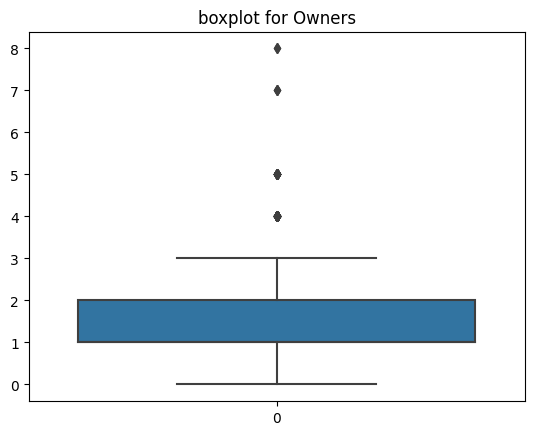

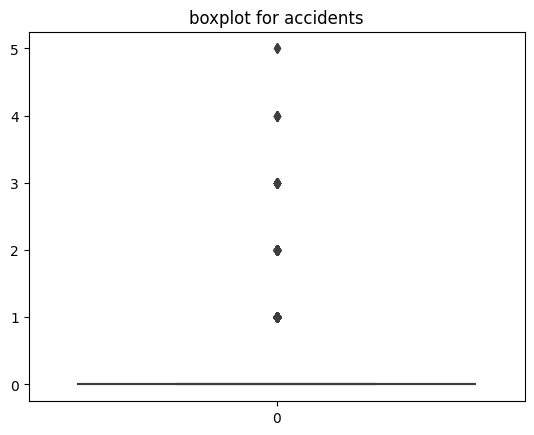

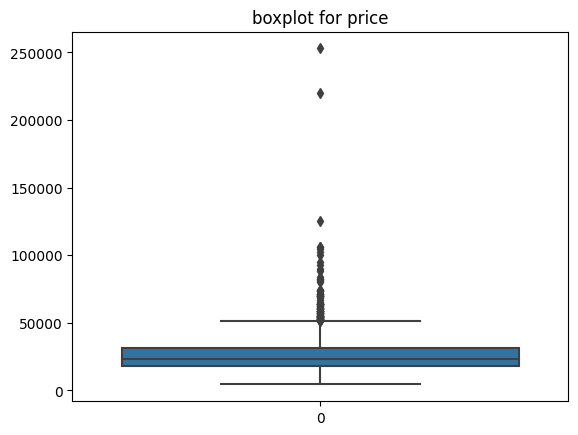

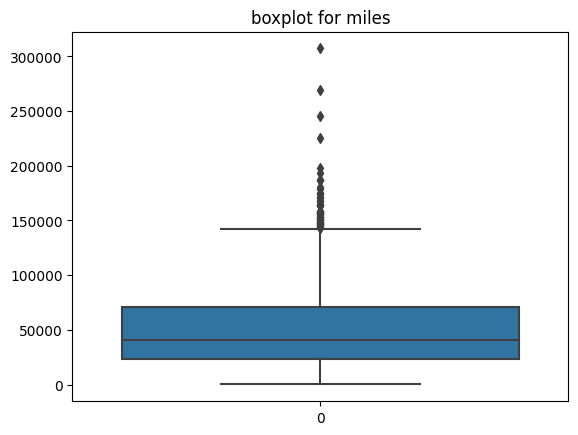

In [16]:
for c in ['year','Owners','accidents','price','miles']:
    sns.boxplot(df[c])
    plt.title("boxplot for "+c)
    plt.show()

# Numerical Data

In [17]:
numeric_cols = ['year','miles','accidents','Owners','price']
from scipy.stats import normaltest
for c in numeric_cols:
    stat, p_value = normaltest(df[c])
    if p_value < 0.05:
        print(c,'NumericColumn is not normally distributed.')
    else:
        print(c,'NumericColumn follows a normal distribution.')

year NumericColumn is not normally distributed.
miles NumericColumn is not normally distributed.
accidents NumericColumn is not normally distributed.
Owners NumericColumn is not normally distributed.
price NumericColumn is not normally distributed.


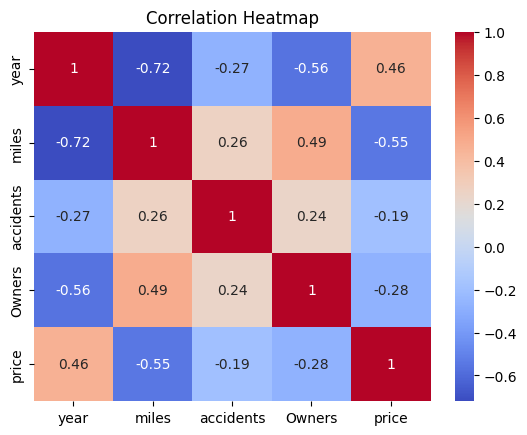

In [18]:
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Identify highly correlated columns
highly_correlated_vars = set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8 and (col2, col1) not in highly_correlated_vars:
            highly_correlated_vars.add((col1, col2))

# Convert the set to a list
highly_correlated_vars_list = list(highly_correlated_vars)

print("Highly Correlated Variables:")
print(highly_correlated_vars_list)

# Identify weakly correlated columns
weakly_correlated_vars = set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) < 0.5 and (col2, col1) not in weakly_correlated_vars:
            weakly_correlated_vars.add((col1, col2))

# Convert the set to a list
weakly_correlated_vars_list = list(weakly_correlated_vars)

print("\nWeakly Correlated Variables:")
print(weakly_correlated_vars_list)

Highly Correlated Variables:
[]

Weakly Correlated Variables:
[('accidents', 'Owners'), ('Owners', 'price'), ('year', 'price'), ('year', 'accidents'), ('miles', 'Owners'), ('accidents', 'price'), ('miles', 'accidents')]


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variables with high VIF values (typically above 5 or 10) may indicate multicollinearity.
# Assuming 'X' is your design matrix (independent variables)
vif_data = pd.DataFrame()
vif_data["Variable"] = df[['year','miles','accidents','Owners']].columns
vif_data["VIF"] = [variance_inflation_factor(df[['year','miles','accidents','Owners']].values, i) for i in range(df[['year','miles','accidents','Owners']].shape[1])]
vif_data

,Variable,VIF
0,year,4.375097
1,miles,3.894792
2,accidents,1.325610
3,Owners,5.371175


In [21]:
from scipy.stats import spearmanr

# Example data
independent_variable = df[['year','miles','accidents','Owners']]
dependent_variable = df[['price']]

# Calculate Spearman correlation coefficient
rho, p_value = spearmanr(independent_variable, dependent_variable)

print(f"Spearman Correlation Coefficient: \n",np.round(rho,2))
print(f"P-value: \n",np.round(p_value,2))

Spearman Correlation Coefficient: 
 [[ 1.   -0.75 -0.29 -0.58  0.61]
 [-0.75  1.    0.27  0.5  -0.68]
 [-0.29  0.27  1.    0.23 -0.23]
 [-0.58  0.5   0.23  1.   -0.39]
 [ 0.61 -0.68 -0.23 -0.39  1.  ]]
P-value: 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


* Pearson correlation includes both variables, and it assesses linear relationships.
* Spearman correlation includes both variables, and it assesses monotonic relationships.
* All linear relationships are monotonic, but not all monotonic relationships are linear. A monotonic relationship indicates a consistent directional trend, while a linear relationship specifically refers to a proportional change represented by a straight line.
* When calculating the Variance Inflation Factor (VIF), you do not include the dependent variable (target variable) because VIF is specifically designed to assess multicollinearity among independent variables in a regression model.